In [25]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # modele d'exemple a modifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [3]:
# Import data
data = pd.read_csv('data/train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)

X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Analyse data
#--- exemple ---
data.head()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,111866,2,1,1.0,1,32.0,1.0,0.0,1.0,1,...,1,0.0,2.0,15.0,0.0,0.0,1,7,6.0,6.0
1,206199,0,0,1.0,1,28.0,0.0,0.0,0.0,0,...,1,0.0,4.0,4.0,30.0,0.0,0,10,6.0,7.0
2,144211,0,0,1.0,1,24.0,1.0,0.0,0.0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,12,5.0,6.0
3,89872,2,1,1.0,1,38.0,0.0,0.0,0.0,1,...,1,0.0,3.0,0.0,0.0,0.0,1,7,6.0,8.0
4,34953,0,0,1.0,1,30.0,0.0,0.0,0.0,0,...,0,1.0,4.0,10.0,0.0,0.0,0,5,3.0,7.0


In [6]:
data.shape

(47276, 23)

In [5]:
data.describe()

,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [7]:
data.duplicated().sum()

0

In [12]:
data.nunique()

Unnamed: 0              47276
Diabetes_012                3
HighBP                      2
HighChol                    2
CholCheck                   2
BMI                        74
Smoker                      2
Stroke                      2
HeartDiseaseorAttack        2
PhysActivity                2
Fruits                      2
Veggies                     2
HvyAlcoholConsump           2
AnyHealthcare               2
NoDocbcCost                 2
GenHlth                     5
MentHlth                   31
PhysHlth                   30
DiffWalk                    2
Sex                         2
Age                        13
Education                   6
Income                     11
dtype: int64

In [13]:
data.dtypes

Unnamed: 0                int64
Diabetes_012              int64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    int64
Veggies                   int64
HvyAlcoholConsump         int64
AnyHealthcare             int64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                       int64
Age                       int64
Education               float64
Income                  float64
dtype: object

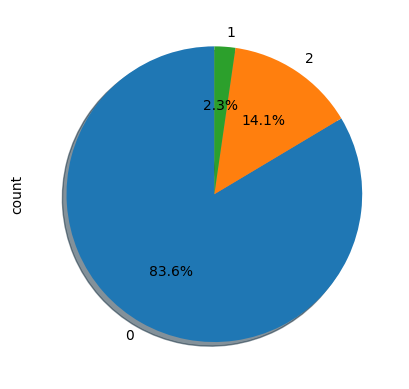

In [26]:
data["Diabetes_012"].value_counts().plot.pie( autopct='%1.1f%%',shadow=True, startangle=90);


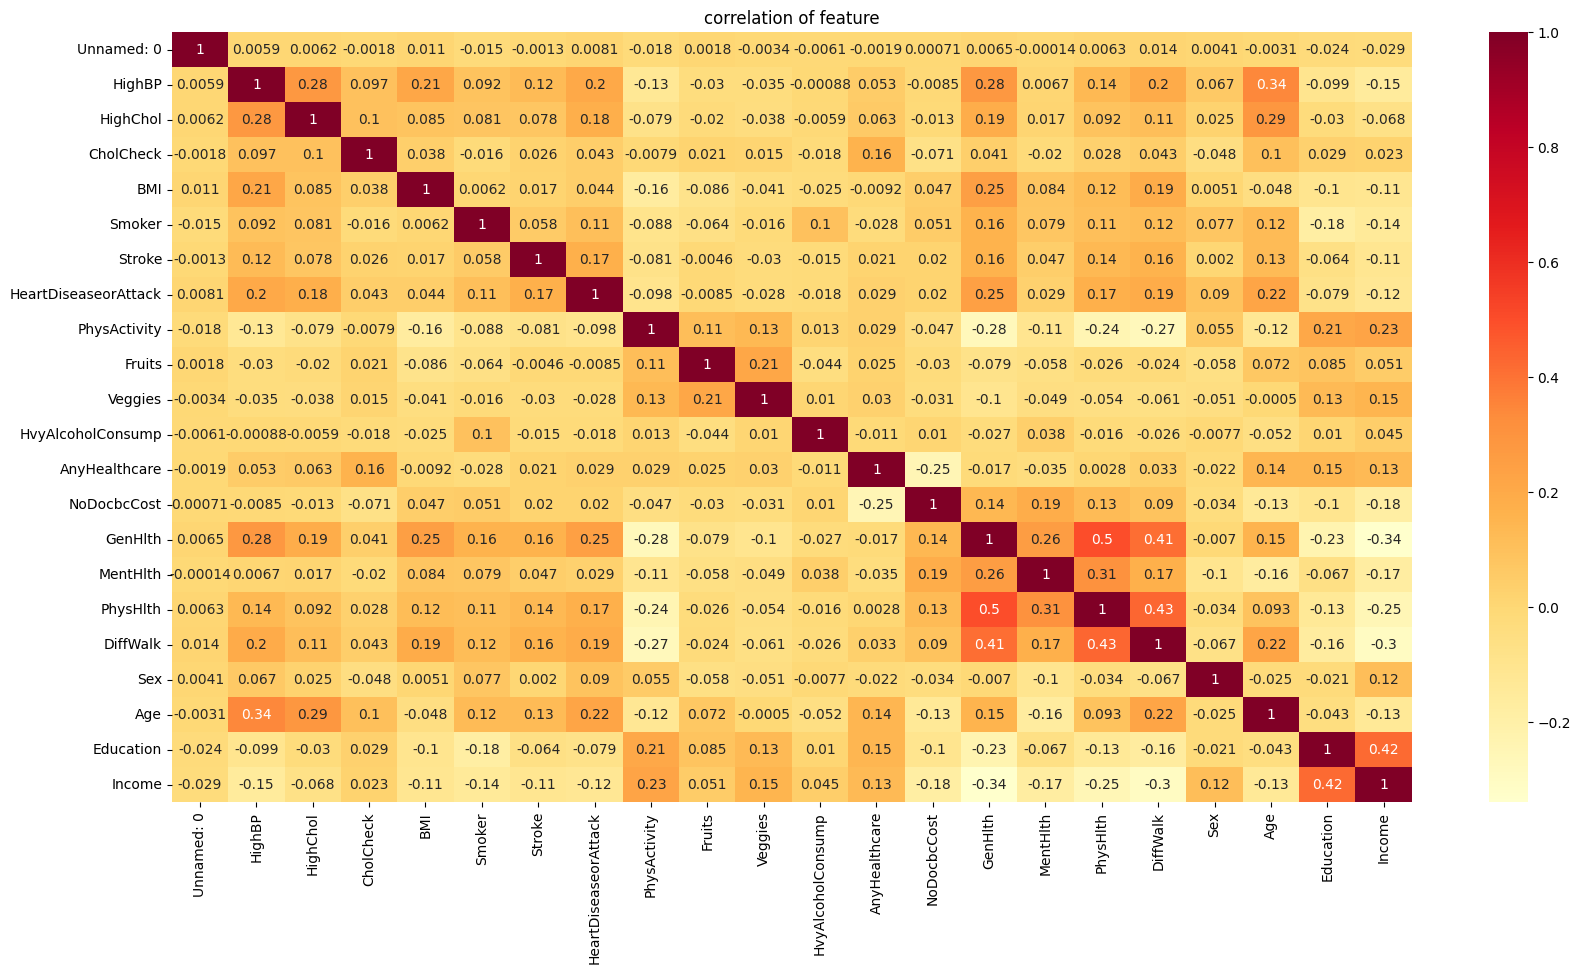

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

In [4]:
# Initialize the model
#---- à modifier en utilisant l'un des trois modeles : SVM, RandomForest et GradientBoosting ----
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

GaussianNB()

In [5]:
# Predict on test data
pred = clf.predict(X_test)

In [6]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      7899
           1       1.00      0.00      0.00       220
           2       0.31      0.21      0.25      1337

    accuracy                           0.80      9456
   macro avg       0.72      0.38      0.38      9456
weighted avg       0.78      0.80      0.78      9456



In [7]:
# Export model
pickle.dump(clf, open("classification_model.pkl", "wb"))